### **Problem Recap:**
The goal is to optimize the bonus allocation process, ensuring it aligns with the business objectives of maximizing customer satisfaction, minimizing variance, and increasing both profits and revenues.


A machine learning model will help predict which customers should receive bonuses based on key performance indicators (KPIs).

### **Import  Libraries**

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [230]:
# Import the dataset
df = pd.read_csv("/content/total_clean_data.csv")


In [231]:
#print top 5 rows in the dataset
df.head()

,customer_id,first_name,last_name,country,age,gender,income_level,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
0,9936,Misty,Brown,Luxembourg,37,Male,24678,54,9.0,293.0,37.0,95151.0,998.0,100.0,1000.0,5000.0,500.0,50000.0,0
1,4237,Cynthia,Ford,South Georgia and the South Sandwich Islands,26,Male,121168,38,14.0,300.0,42.0,94933.0,994.0,100.0,1000.0,5000.0,500.0,50000.0,1
2,5609,Cynthia,Munoz,Nicaragua,74,Male,60929,33,7.0,148.0,28.0,89927.0,995.0,100.0,1000.0,5000.0,500.0,50000.0,0
3,2456,Angela,Anderson,Saint Martin,62,Male,32434,16,35.0,336.0,31.0,94270.0,997.0,100.0,1000.0,5000.0,500.0,50000.0,0
4,8815,Jason,Myers,American Samoa,32,Female,68083,16,19.0,141.0,39.0,98939.0,991.0,100.0,1000.0,5000.0,500.0,50000.0,0


### **Exploratory Data Analysis(EDA)**

In [232]:
# Separate numerical and categorical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])


In [233]:
# Data types  of the dataset
df.dtypes

,0
customer_id,int64
first_name,object
last_name,object
country,object
age,int64
gender,object
income_level,int64
Winning_percentage,int64
Days_Since_Last_Bet,float64
Active_Days,float64


In [234]:
#shape of the dataset
df.shape

(5000, 19)

In [235]:
##Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       5000 non-null   int64  
 1   first_name                        5000 non-null   object 
 2   last_name                         5000 non-null   object 
 3   country                           5000 non-null   object 
 4   age                               5000 non-null   int64  
 5   gender                            5000 non-null   object 
 6   income_level                      5000 non-null   int64  
 7   Winning_percentage                5000 non-null   int64  
 8   Days_Since_Last_Bet               5000 non-null   float64
 9   Active_Days                       5000 non-null   float64
 10  Total_Number_of_Bets              5000 non-null   float64
 11  Total_Amount_Wagered              5000 non-null   float64
 12  Averag

In [236]:
# Dropping irrelevant columns
df = df.drop(columns=['customer_id', 'first_name', 'last_name', 'country'])


In [237]:
df.head()

,age,gender,income_level,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
0,37,Male,24678,54,9.0,293.0,37.0,95151.0,998.0,100.0,1000.0,5000.0,500.0,50000.0,0
1,26,Male,121168,38,14.0,300.0,42.0,94933.0,994.0,100.0,1000.0,5000.0,500.0,50000.0,1
2,74,Male,60929,33,7.0,148.0,28.0,89927.0,995.0,100.0,1000.0,5000.0,500.0,50000.0,0
3,62,Male,32434,16,35.0,336.0,31.0,94270.0,997.0,100.0,1000.0,5000.0,500.0,50000.0,0
4,32,Female,68083,16,19.0,141.0,39.0,98939.0,991.0,100.0,1000.0,5000.0,500.0,50000.0,0


In [238]:
# Separate numerical and categorical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

In [239]:
# Basic EDA
df.info()  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               5000 non-null   int64  
 1   gender                            5000 non-null   object 
 2   income_level                      5000 non-null   int64  
 3   Winning_percentage                5000 non-null   int64  
 4   Days_Since_Last_Bet               5000 non-null   float64
 5   Active_Days                       5000 non-null   float64
 6   Total_Number_of_Bets              5000 non-null   float64
 7   Total_Amount_Wagered              5000 non-null   float64
 8   Average_Bet_Amount                5000 non-null   float64
 9   Number_of_Bonuses_Received        5000 non-null   float64
 10  Amount_of_Bonuses_Received        5000 non-null   float64
 11  Revenue_from_Bonuses              5000 non-null   float64
 12  Increa

In [240]:
df.isnull().sum()  # Check for null values

,0
age,0
gender,0
income_level,0
Winning_percentage,0
Days_Since_Last_Bet,0
Active_Days,0
Total_Number_of_Bets,0
Total_Amount_Wagered,0
Average_Bet_Amount,0
Number_of_Bonuses_Received,0


In [241]:
df.describe().T  # Summary statistics

,count,mean,std,min,25%,50%,75%,max
age,5000.0,49.2768,17.713310,18.0,35.0,50.0,64.0,80.0
income_level,5000.0,83197.1966,38848.103394,20021.0,49970.0,82739.0,116781.0,149892.0
Winning_percentage,5000.0,42.2168,21.727858,5.0,23.0,43.0,61.0,79.0
Days_Since_Last_Bet,5000.0,20.7096,11.790007,1.0,10.0,20.0,31.0,40.0
Active_Days,5000.0,227.1254,82.205557,90.0,155.0,228.0,300.0,365.0
Total_Number_of_Bets,5000.0,34.9712,9.823384,1.0,28.0,36.0,43.0,50.0
Total_Amount_Wagered,5000.0,89207.9960,11631.473242,100.0,87329.0,92525.0,95401.0,100000.0
Average_Bet_Amount,5000.0,976.7500,69.314325,10.0,987.0,992.0,995.0,1000.0
Number_of_Bonuses_Received,5000.0,99.4244,4.360560,1.0,100.0,100.0,100.0,100.0
Amount_of_Bonuses_Received,5000.0,997.3970,33.523779,10.0,1000.0,1000.0,1000.0,1000.0


In [242]:
# df.fillna(df.median(), inplace=True)  # Example imputation for numerical columns

In [243]:
df['Should_Receive_Bonus'].value_counts()

,count
Should_Receive_Bonus,
1,3593
0,1407


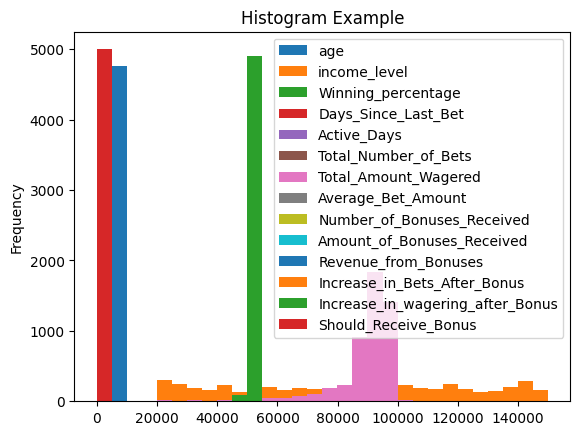

In [244]:
# Histogram
df.plot(kind='hist', bins=30, title='Histogram Example')
plt.show()

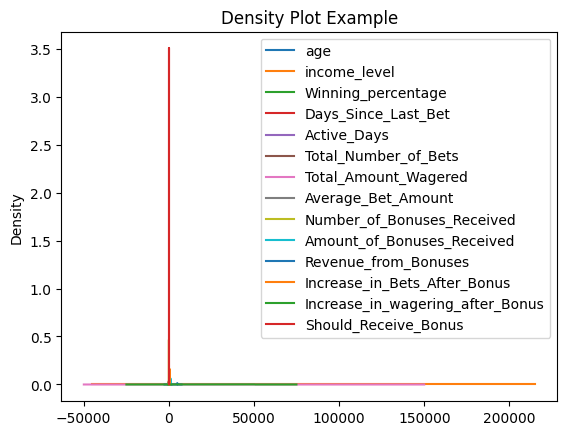

In [245]:
# Density Plot
df.plot(kind='density', title='Density Plot Example')
plt.show()

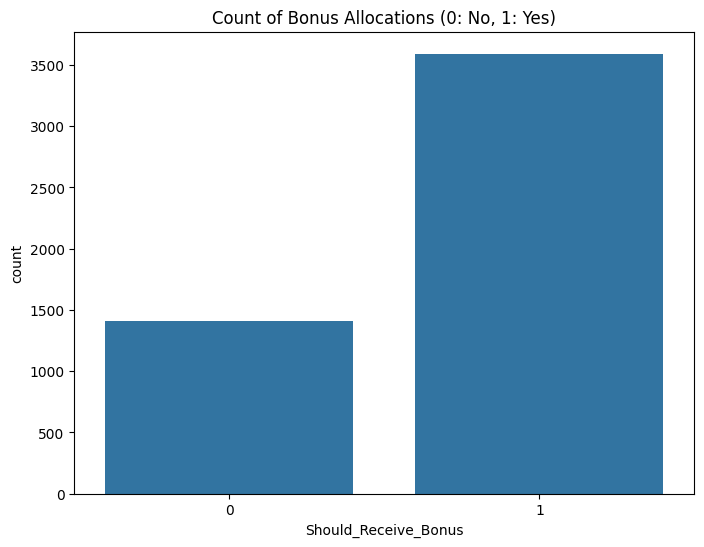

In [246]:
##COunt plot on the Bonous(target)
plt.figure(figsize=(8, 6))
sns.countplot(x='Should_Receive_Bonus', data=df)
plt.title('Count of Bonus Allocations (0: No, 1: Yes)')
plt.show()


### **Handling Outliers with Winsorization**

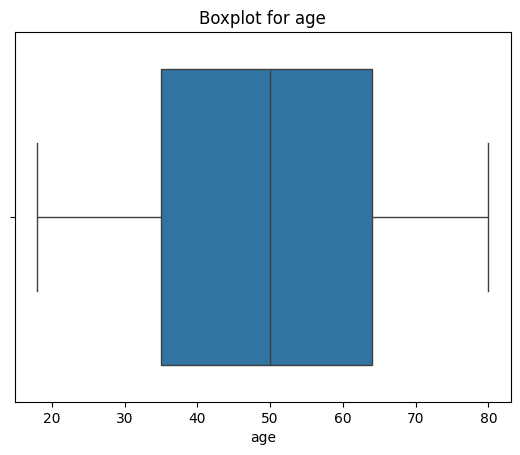

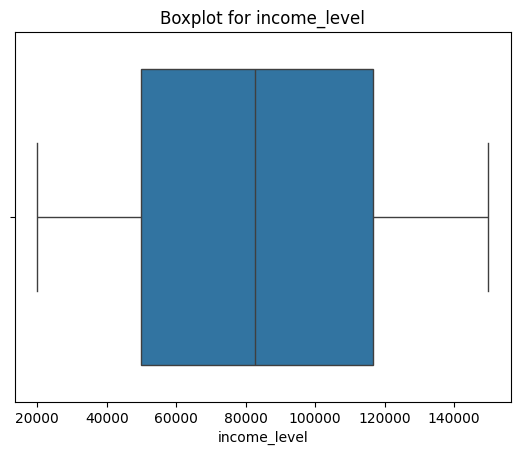

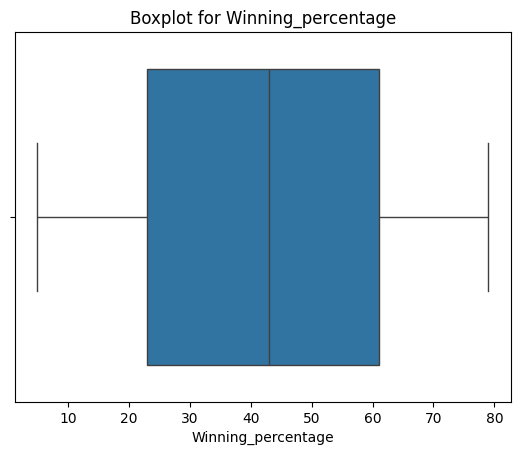

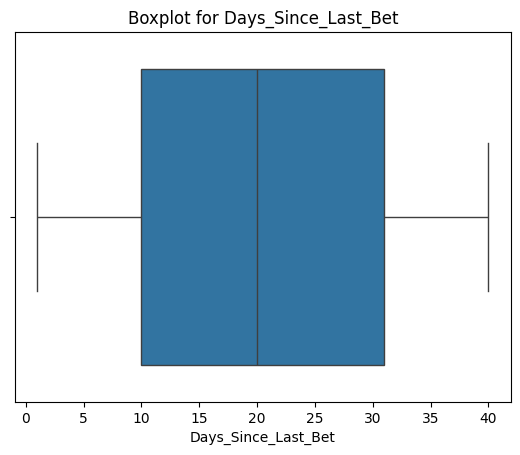

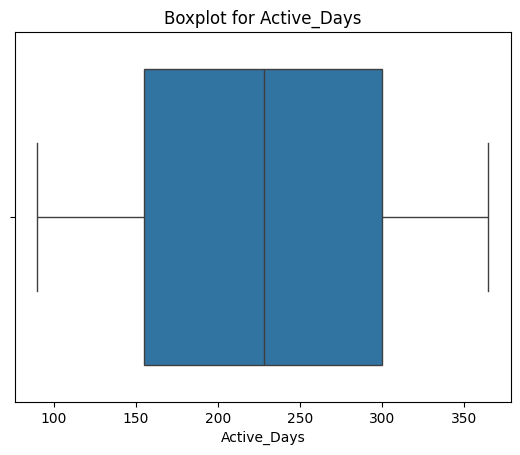

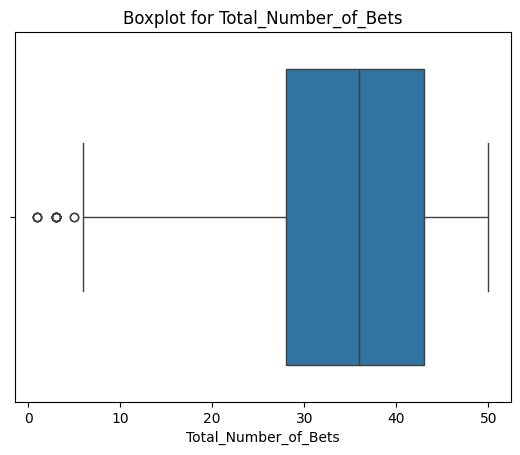

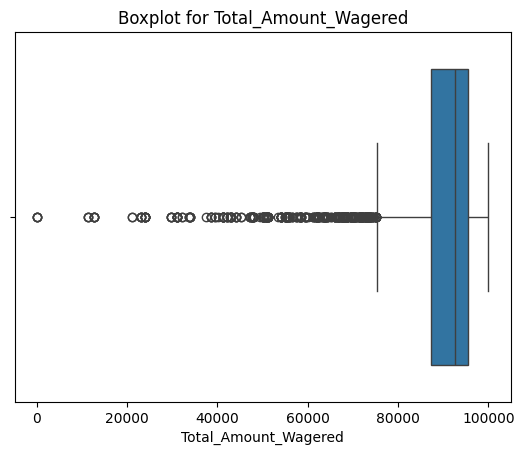

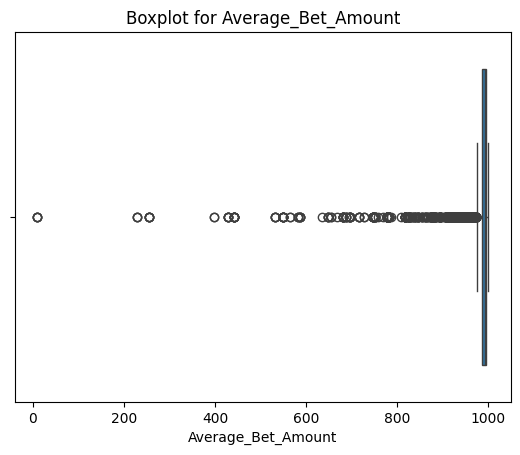

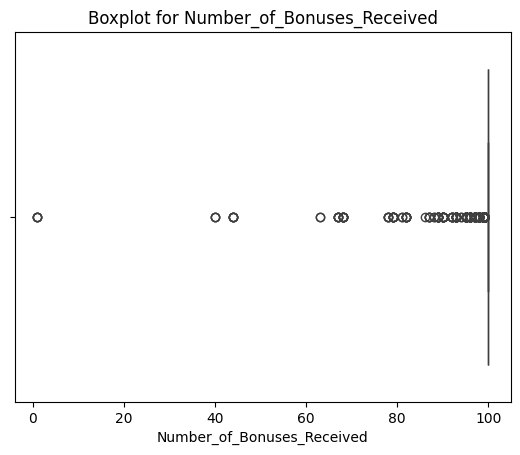

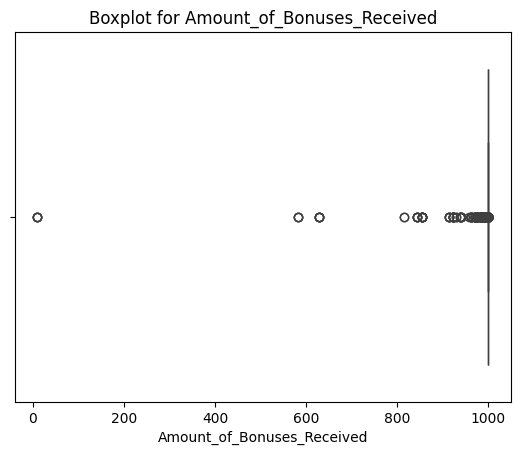

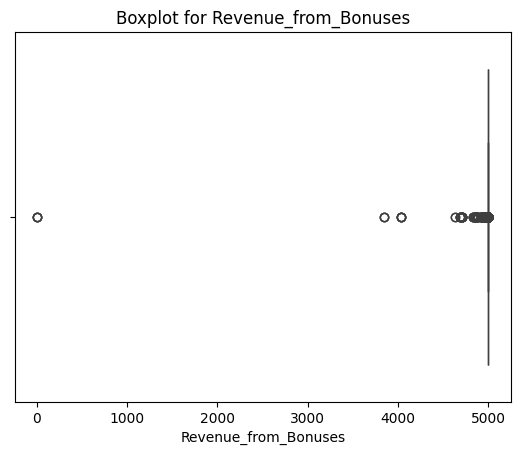

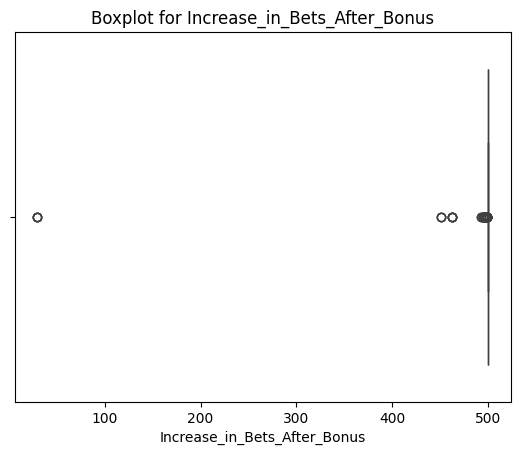

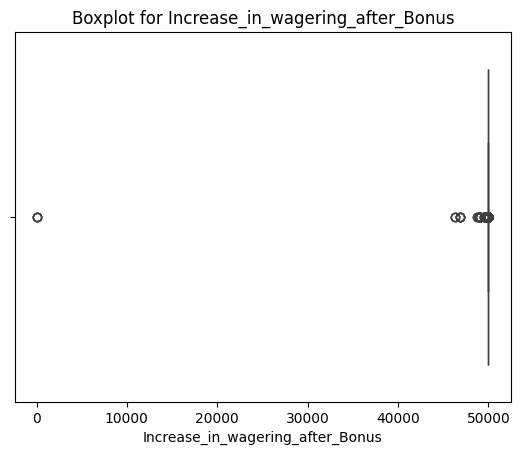

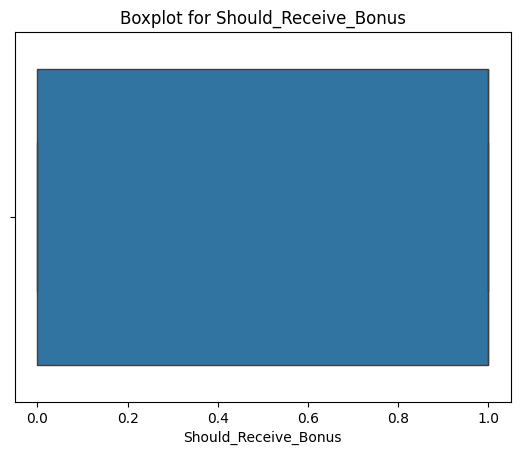

In [247]:
# Finding outliers of numerical columns using for loop and boxplot
for col in df_num.columns:
    plt.figure()
    sns.boxplot(x=df_num[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [248]:
from scipy.stats.mstats import winsorize

# Apply Winsorization
df_winsorized = df.copy()
for column in df.select_dtypes(exclude='object').columns:
    df_winsorized[column] = winsorize(df[column], limits=[0.05, 0.05])


In [249]:
df_winsorized.head()

,age,gender,income_level,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
0,37,Male,24678,54,9.0,293.0,37.0,95151.0,998.0,100.0,1000.0,5000.0,500.0,50000.0,0
1,26,Male,121168,38,14.0,300.0,42.0,94933.0,994.0,100.0,1000.0,5000.0,500.0,50000.0,1
2,74,Male,60929,33,7.0,148.0,28.0,89927.0,995.0,100.0,1000.0,5000.0,500.0,50000.0,0
3,62,Male,32434,16,35.0,336.0,31.0,94270.0,997.0,100.0,1000.0,5000.0,500.0,50000.0,0
4,32,Female,68083,16,19.0,141.0,39.0,98939.0,991.0,100.0,1000.0,5000.0,500.0,50000.0,0


### **Applying Filters Based on Business Rules**

In [250]:
# Define the range conditions
conditions = (
    (df['age'].between(18, 80)) &
    (df['income_level'].between(20000, 150000)) &
    (df['Winning_percentage'].between(5, 80)) &
    (df['Days_Since_Last_Bet'].between(1, 40)) &
    (df['Active_Days'].between(1, 40)) &
    (df['Total_Amount_Wagered'].between(100, 100000)) &
    (df['Average_Bet_Amount'].between(10, 1000)) &
    (df['Number_of_Bonuses_Received'].between(1, 100)) &
    (df['Amount_of_Bonuses_Received'].between(10, 1000)) &
    (df['Revenue_from_Bonuses'].between(10, 5000)) &
    (df['Increase_in_Bets_After_Bonus'].between(80, 500)) &
    (df['Increase_in_wagering_after_Bonus'].between(100, 50000)) &
    (df['Should_Receive_Bonus'].isin([0, 1]))
)

# Apply the conditions to filter the DataFrame
filtered_df = df[conditions]



In [251]:
# Ensure records with min and max in the specified ranges are included
for col, min_val, max_val in [
    ('age', 18, 80),
    ('income_level', 20000, 150000),
    ('Winning_percentage', 5, 80),
    ('Days_Since_Last_Bet', 1, 40),
    ('Active_Days', 1, 40),
    ('Total_Amount_Wagered', 100, 100000),
    ('Average_Bet_Amount', 10, 1000),
    ('Number_of_Bonuses_Received', 1, 100),
    ('Amount_of_Bonuses_Received', 10, 1000),
    ('Revenue_from_Bonuses', 10, 5000),
    ('Increase_in_Bets_After_Bonus', 80, 500),
    ('Increase_in_wagering_after_Bonus', 100, 50000)
]:
    filtered_df = pd.concat([
        filtered_df,
        df[df[col] == min_val],
        df[df[col] == max_val]
    ]).drop_duplicates()



In [252]:
filtered_df.head()

,age,gender,income_level,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
79,18,Female,133428,66,25.0,358.0,34.0,99778.0,990.0,100.0,1000.0,5000.0,500.0,50000.0,1
142,18,Male,138250,5,26.0,126.0,36.0,99725.0,990.0,100.0,1000.0,5000.0,500.0,50000.0,0
203,18,Female,41296,58,40.0,358.0,18.0,67791.0,916.0,99.0,999.0,4997.0,500.0,49999.0,1
296,18,Female,96297,72,6.0,351.0,22.0,79484.0,971.0,100.0,1000.0,5000.0,500.0,50000.0,1
337,18,Female,131886,6,25.0,307.0,45.0,93921.0,992.0,100.0,1000.0,5000.0,500.0,50000.0,1


### **Label Encoding for the Categoriacl Variables**

In [253]:
# Import the necessary library
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the gender column
filtered_df['gender'] = label_encoder.fit_transform(filtered_df['gender'])


In [254]:

# Display the first few rows to see the result
filtered_df.head()

,age,gender,income_level,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
79,18,0,133428,66,25.0,358.0,34.0,99778.0,990.0,100.0,1000.0,5000.0,500.0,50000.0,1
142,18,1,138250,5,26.0,126.0,36.0,99725.0,990.0,100.0,1000.0,5000.0,500.0,50000.0,0
203,18,0,41296,58,40.0,358.0,18.0,67791.0,916.0,99.0,999.0,4997.0,500.0,49999.0,1
296,18,0,96297,72,6.0,351.0,22.0,79484.0,971.0,100.0,1000.0,5000.0,500.0,50000.0,1
337,18,0,131886,6,25.0,307.0,45.0,93921.0,992.0,100.0,1000.0,5000.0,500.0,50000.0,1


### **Split the Data X and Y**

In [255]:
X = filtered_df[['age', 'income_level', 'Winning_percentage', 'Days_Since_Last_Bet', 'Active_Days', 'Total_Number_of_Bets', 'Total_Amount_Wagered', 'Average_Bet_Amount', 'Number_of_Bonuses_Received']]
y = filtered_df['Should_Receive_Bonus']

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor


In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Random Forest Classification**

In [258]:
### **Random Forest Classification**

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


from sklearn.metrics import accuracy_score

print("Accuracy of the RandomForst Classifier:-",accuracy_score(y_test, y_pred_rf))


Accuracy of the RandomForst Classifier:- 0.9698492462311558


In [259]:
# Code to find Precision, Recall, and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_test, y_pred_rf))
print('Recall: %.3f' % recall_score(y_test, y_pred_rf))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_rf))

Precision: 0.971
Recall: 0.987
F1 Score: 0.979


In [260]:
# Train accuracy and test accuracy
print('Train Accuracy: %.3f' % rf.score(X_train, y_train))
print('Test Accuracy: %.3f' % rf.score(X_test, y_test))

Train Accuracy: 1.000
Test Accuracy: 0.970


In [261]:
# Code to save the models
import pickle
pickle.dump(rf, open('gb_model.pkl', 'wb'))

### **XGBRegressor Model**

In [262]:
# XG Boost code to build the model

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regression
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)



from sklearn.metrics import accuracy_score
print("Accuracy of the XGB Classifier:-",accuracy_score(y_test,y_pred_xgb))

Accuracy of the XGB Classifier:- 0.9738693467336683


In [263]:
# Code to find Precision, Recall, and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_test, y_pred_xgb))
print('Recall: %.3f' % recall_score(y_test, y_pred_xgb))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_xgb))


Precision: 0.976
Recall: 0.987
F1 Score: 0.982


In [264]:
# Train accuracy and test accuracy of XG Boost model
print('Train Accuracy: %.3f' % xgb.score(X_train, y_train))
print('Test Accuracy: %.3f' % xgb.score(X_test, y_test))

Train Accuracy: 1.000
Test Accuracy: 0.974


In [265]:
# Code to save the XG Boost model
import pickle
pickle.dump(xgb, open('xgb_model.pkl', 'wb'))



### **Gradient Boost Regressor**

In [266]:
# Gradient Boosting code to build the model

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regression
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)





from sklearn.metrics import accuracy_score
print("Accuracy of the Gradient Boosting:-",accuracy_score(y_test,y_pred_gb))



# Code to find Precision, Recall, and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_test, y_pred_gb))
print('Recall: %.3f' % recall_score(y_test, y_pred_gb))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_gb))



Accuracy of the Gradient Boosting:- 0.9778894472361809
Precision: 0.978
Recall: 0.992
F1 Score: 0.985


In [267]:
# Train accuracy and test accuracy of Gradient Boosting model
print('Train Accuracy: %.3f' % gb.score(X_train, y_train))
print('Test Accuracy: %.3f' % gb.score(X_test, y_test))




Train Accuracy: 0.991
Test Accuracy: 0.978


In [268]:
import pickle
# Code to save the Gradient Boosting model
pickle.dump(gb, open('gb_model.pkl', 'wb'))
